# Exploratory Data Analysis (EDA)

## Table of Contents
1. [Dataset Overview](#dataset-overview)
2. [Handling Missing Values](#handling-missing-values)
3. [Feature Distributions](#feature-distributions)
4. [Possible Biases](#possible-biases)
5. [Correlations](#correlations)


. [Correlations](#correlations)


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Dataset Overview

[Provide a high-level overview of the dataset. This should include the source of the dataset, the number of samples, the number of features, and example showing the structure of the dataset.]


In [ ]:

# Load the data
# Replace 'your_dataset.csv' with the path to your actual dataset
df = pd.read_csv('../Data/Realisierter_Stromverbrauch_201811010000_202411010000_Stunde.csv', sep=';', names=["from", "to", "load", "residual", "pumped"], header=0)

# Number of samples
num_samples = df.shape[0]

# Number of features
num_features = df.shape[1]

# Display these dataset characteristics
print(f"Number of samples: {num_samples}")
print(f"Number of features: {num_features}")

# Display the first few rows of the dataframe to show the structure
print("Example data:")
print(df.head())



Number of samples: 52608
Number of features: 5
Example data:
               from                to       load   residual    pumped
0  01.10.2018 00:00  01.10.2018 01:00          -          -  3.483,00
1  01.10.2018 01:00  01.10.2018 02:00  42.064,50  36.009,25  3.945,25
2  01.10.2018 02:00  01.10.2018 03:00  41.274,50  35.240,50  3.868,75
3  01.10.2018 03:00  01.10.2018 04:00  42.095,50  35.795,00  4.896,00
4  01.10.2018 04:00  01.10.2018 05:00  43.659,00  36.541,50  5.388,00


In [3]:
#Check datatypes

df.dtypes

from        object
to          object
load        object
residual    object
pumped      object
dtype: object

The datatypes are all "object". To work with the data, we convert the columns "load", "residual" and "pumped" to floats. The columns "from" and "to" are separated into the components day, month, year and time.

In [4]:
#The decimal separator must first be changed from comma to full stop. 


df['load'] = df['load'].str.replace(',', '.').astype(float)
df['load']

0        47180.00
1        45215.00
2        44315.25
3        44530.25
4        45318.25
           ...   
43843    59605.00
43844    56859.25
43845    54040.50
43846    51405.00
43847    48110.75
Name: load, Length: 43848, dtype: float64

In [18]:
#split column "from" into day, month, year, hour and minute
from datetime import datetime

for i in range (len(df.index)):
    x = str(df.at[i, 'from'])
    df.at[i, 'from'] = datetime.strptime(str(x), '%d.%m.%Y %H:%M')
 

In [21]:
print(type(df.at[5, 'from']))

<class 'datetime.datetime'>


## Handling Missing Values

[Identify any missing values in the dataset, and describe your approach to handle them if there are any. If there are no missing values simply indicate that there are none.]


In [5]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)


from        0
to          0
load        0
residual    0
pumped      0
dtype: int64


While trying to convert the data from object to float, an error occurred, because one value was '-' and could not be converted.
This seems to be a missing value. We check for more missing values.

In [6]:
#To convert data to float, missing values that are not numbers, must be detected and eliminated
for i in range (len(df.index)):
    x = str(df.at[i, 'residual'])
    if (x=='-' or x=='0'):
        print(i, x)


42998 -


Only one missing value was found, represented by '-'. We replace it with the average of the values before and after.

In [7]:
df['residual'] = df['residual'].str.replace(',', '.')

print(df.at[42998, 'residual'])

df.at[42998, 'residual'] = (float(df.at[42998-1, 'residual']) + float(df.at[42998+1, 'residual']))/2

print(df.at[42998, 'residual'])

df['residual'] = df['residual'].astype(float)
df['residual']

-
20043.625


0        31711.75
1        30137.00
2        29785.50
3        30077.75
4        30044.25
           ...   
43843    40750.25
43844    37263.25
43845    33643.00
43846    31200.00
43847    27287.50
Name: residual, Length: 43848, dtype: float64

In [8]:
# Handling missing values
# Example: Replacing NaN values with the mean value of the column
# df.fillna(df.mean(), inplace=True)

# Your code for handling missing values goes here


## Plot the Data

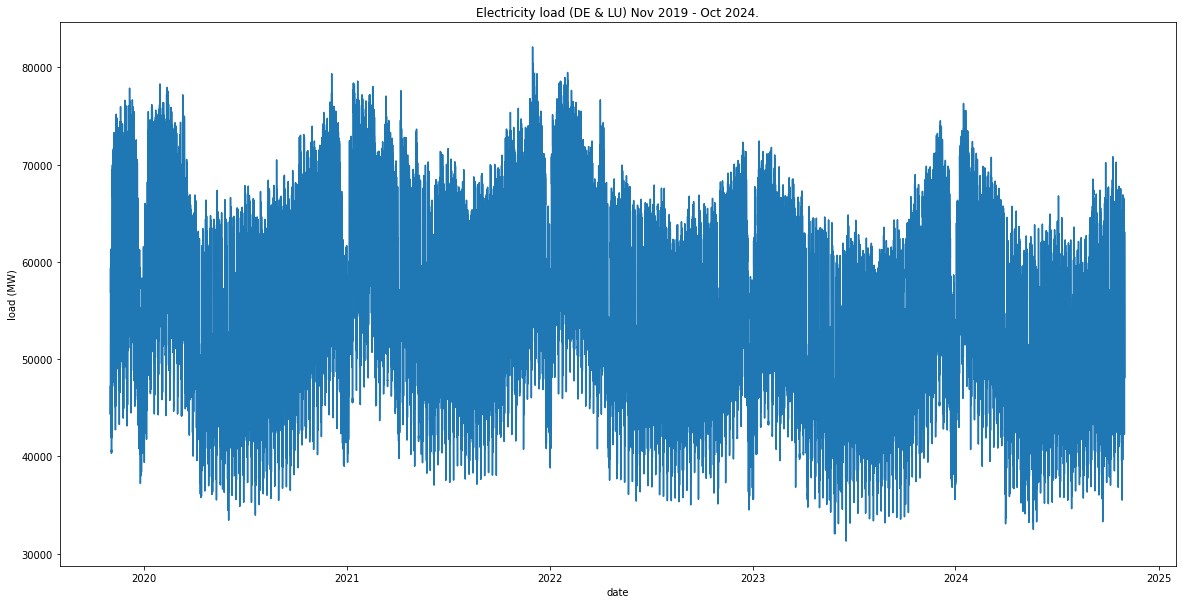

In [34]:
x = df['from']
y = df['load']
plt.figure(figsize=(20, 10))
plt.plot(x, y)
plt.title('Electricity load (DE & LU) Nov 2019 - Oct 2024.')
plt.xlabel('date')
plt.ylabel('load (MW)')
plt.show()

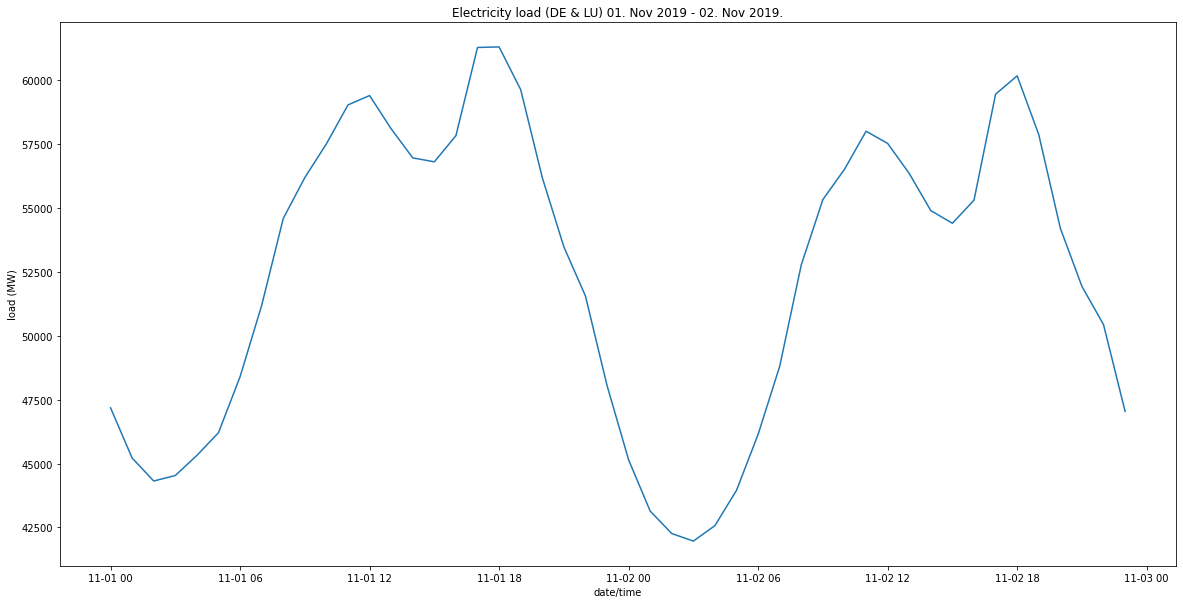

In [37]:
#plot data for 2 days:

df_days = df.iloc[:48]
x = df_days['from']
y = df_days['load']
plt.figure(figsize=(20, 10))
plt.plot(x, y)
plt.title('Electricity load (DE & LU) 01. Nov 2019 - 02. Nov 2019.')
plt.xlabel('date/time')
plt.ylabel('load (MW)')
plt.show()

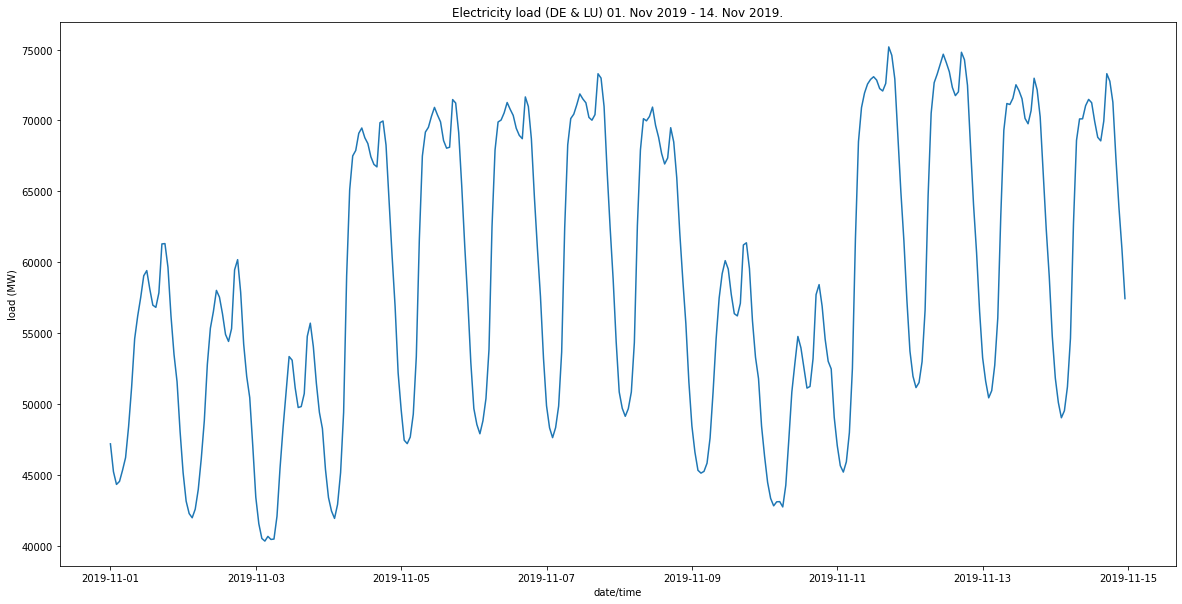

In [38]:
#plot data for 2 weeks:

df_weeks = df.iloc[:336]
x = df_weeks['from']
y = df_weeks['load']
plt.figure(figsize=(20, 10))
plt.plot(x, y)
plt.title('Electricity load (DE & LU) 01. Nov 2019 - 14. Nov 2019.')
plt.xlabel('date/time')
plt.ylabel('load (MW)')
plt.show()

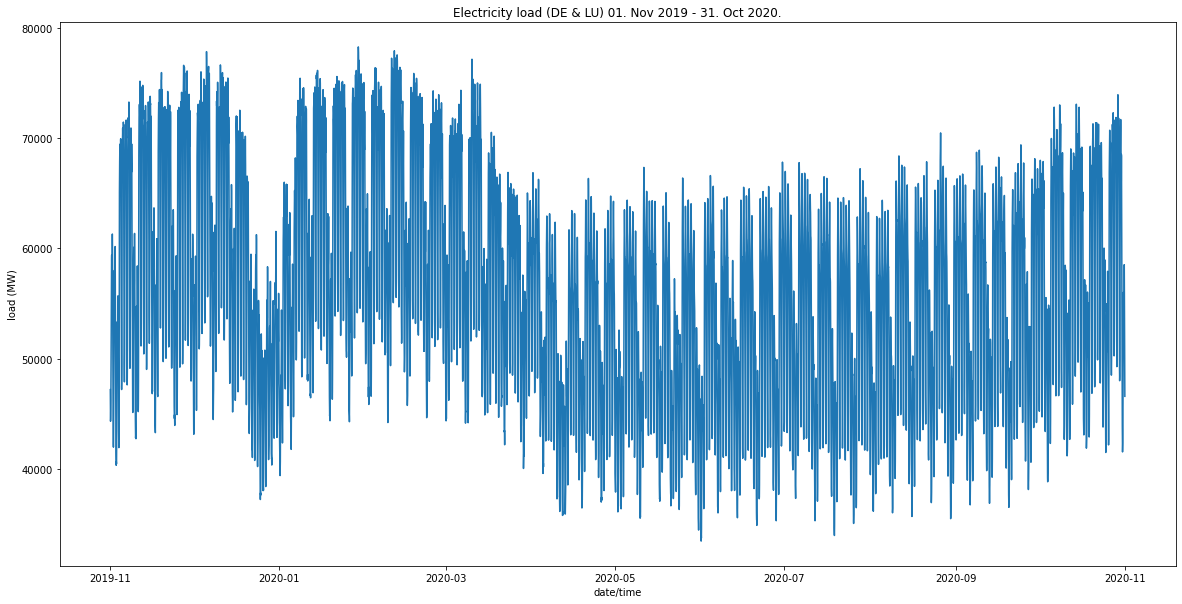

In [39]:
#plot data for 1 year:

df_year = df.iloc[:8784]
x = df_year['from']
y = df_year['load']
plt.figure(figsize=(20, 10))
plt.plot(x, y)
plt.title('Electricity load (DE & LU) 01. Nov 2019 - 31. Oct 2020.')
plt.xlabel('date/time')
plt.ylabel('load (MW)')
plt.show()

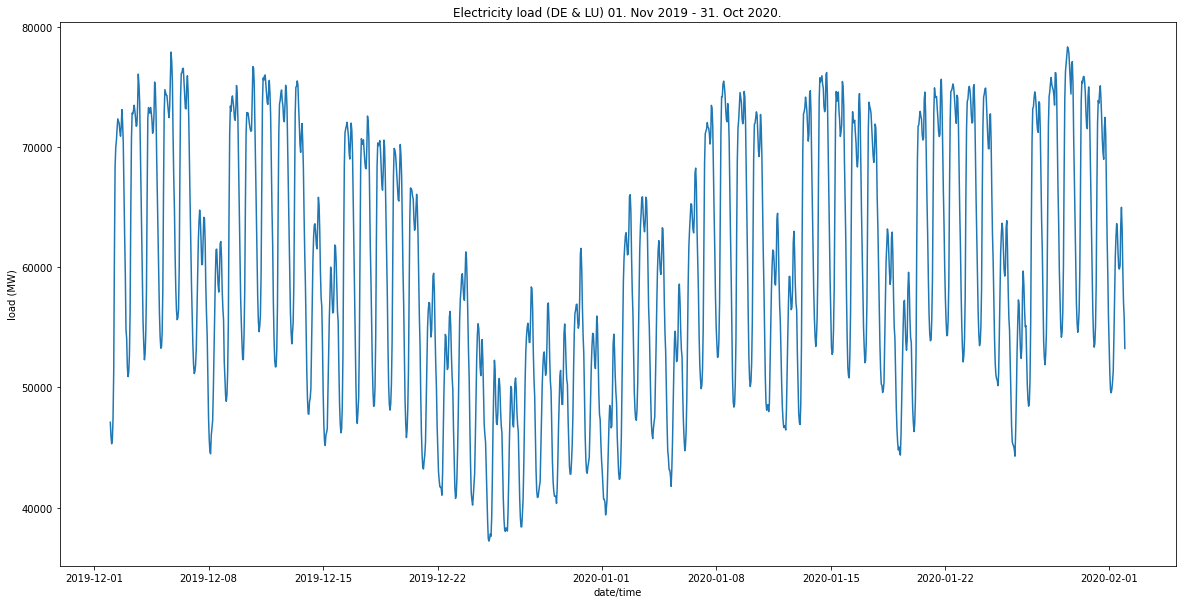

In [40]:
#plot data for Dec / Jan:

df_winter = df.iloc[744:2232]
x = df_winter['from']
y = df_winter['load']
plt.figure(figsize=(20, 10))
plt.plot(x, y)
plt.title('Electricity load (DE & LU) 01. Nov 2019 - 31. Oct 2020.')
plt.xlabel('date/time')
plt.ylabel('load (MW)')
plt.show()

## Feature Distributions

[Plot the distribution of various features and target variables. Comment on the skewness, outliers, or any other observations.]


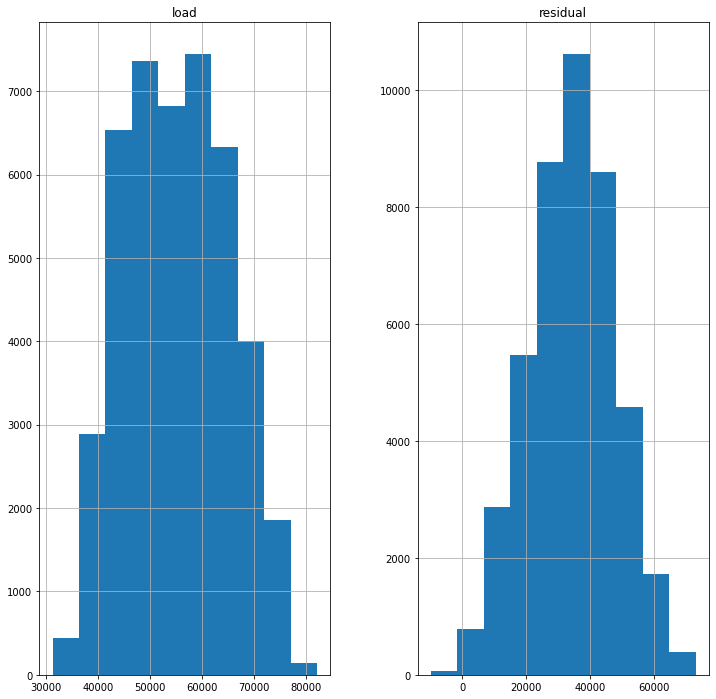

In [9]:
# Example: Plotting histograms of all numerical features
df.hist(figsize=(12, 12))
plt.show()


## Possible Biases

[Investigate the dataset for any biases that could affect the model’s performance and fairness (e.g., class imbalance, historical biases).]


In [ ]:
# Example: Checking for class imbalance in a classification problem
# sns.countplot(x='target_variable', data=df)

# Your code to investigate possible biases goes here


## Correlations

[Explore correlations between features and the target variable, as well as among features themselves.]


In [4]:
# Example: Plotting a heatmap to show feature correlations
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()


ValueError: could not convert string to float: '01.11.2019 00:00'